In [1]:
import numpy as np

from astropy.table import QTable
import astropy.units as u

import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from Pipe3D_rotation_curve import extract_data, calc_rot_curve
#from DRP_rotation_curve import extract_data, extract_Pipe3d_data, calc_rot_curve
from dark_matter_mass_plottingFunctions_v2 import plot_fitted_rot_curve, plot_fitted_rot_curve_mass

# Galaxies to plot

In [2]:
FILE_IDS = ['8939-6102']

IMAGE_DIR = '../spirals/Images/Pipe3D/'
#IMAGE_DIR = '../spirals/Images/DRP/'

FILE_DIR = '../spirals/Pipe3D-rot_curve_data_files/'
#FILE_DIR = '../spirals/DRP-rot_curve_data_files/'

# Read in data

In [3]:
#master_table = QTable.read( '../spirals/Pipe3D-master_file_vflag_10.txt', format='ascii.ecsv')
master_table = QTable.read( '../spirals/Pipe3D-master_file_vflag_10_OLD-LIMITS.txt', format='ascii.ecsv')
#master_table = QTable.read('../spirals/DRPall-master_file_30.txt', format='ascii.ecsv')

PIPE3D_FOLDER = '../data/MaNGA/MaNGA_DR15/pipe3d/'
#MANGA_FOLDER = '../data/MaNGA/MaNGA_DR16/HYB10-GAU-MILESHC/'

In [4]:
mass_outputs = {'center_flux': 0.1124136 * (u.erg / (u.cm*u.cm*u.s)), 
                'center_flux_error': 0.00113667 * (u.erg / (u.cm*u.cm*u.s)), 
                'frac_masked_spaxels': 0.11757789535567313, 
                'v_max': 40.644736 * (u.km / u.s), 
                'r_turn': 1.14601382 * u.kpc, 
                'v_max_sigma': 14.57015989 * (u.km / u.s), 
                'r_turn_sigma': 0.64972702 * u.kpc, 
                'chi_square_rot': 71.36754708221488, 
                'chi_square_ndf': 7.9297274535794315, 
                'Rmax': 2.45033143 * u.kpc, 
                'Mtot': 9.41179275e+08 * u.solMass, 
                'Mtot_error': 6.74780248e+08 * u.solMass, 
                'Mdark': -1.40713289e+09 * u.solMass, 
                'Mdark_error': 6.74780248e+08 * u.solMass, 
                'Mstar': 2.34831216e+09 * u.solMass, 
                'Mdark_Mstar_ratio': -0.59921032, 
                'Mdark_Mstar_ratio_error': 0.28734691, 
                'Mtot_Mstar_ratio': 0.40078968, 
                'Mtot_Mstar_ratio_error': 0.28734691, 
                'good_fit': True, 
                'points_cut': 5}

# Fitted rotation curve plots

0.015326274 -18.4399356842041


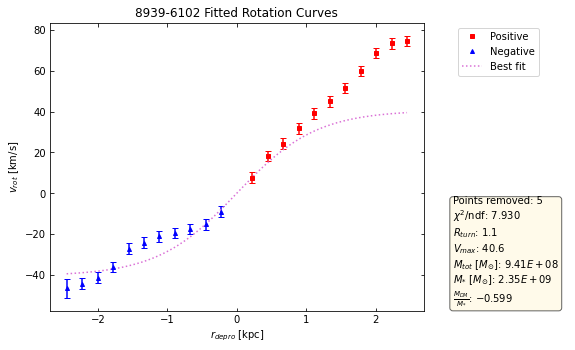

In [5]:
%matplotlib inline

for i in range(len(FILE_IDS)):

    #######################################################################
    # Find galaxy in master_table
    #----------------------------------------------------------------------
    plate, IFU = FILE_IDS[i].split('-')

    plate_boolean = master_table['MaNGA_plate'] == int(plate)
    IFU_boolean = master_table['MaNGA_IFU'] == int(IFU)

    row = master_table[plate_boolean & IFU_boolean]

    print(row['NSA_redshift'][0], row['rabsmag'][0])
    #----------------------------------------------------------------------


    #######################################################################
    # Plot fitted rotation curve
    #----------------------------------------------------------------------
    #plot_fitted_rot_curve( FILE_IDS[i], row[0], FILE_DIR)
    plot_fitted_rot_curve( FILE_IDS[i], mass_outputs, FILE_DIR)
    #----------------------------------------------------------------------